# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов!

Данные мы будем использовать из Kaggle соревнования: https://www.kaggle.com/competitions/nlp-getting-started/data 


Оттуда надо скачать файл train.csv. На обучающую и тестовую выборки его поделим кодом ниже, менять его не надо!

Мы будем работать с датасетом постов из твиттера. Нам предстоит решать задачу бинарной классификации - определять содержатся ли в твитте информация о настоящей катастрофе/инциденте или нет.

In [2]:
import numpy as np
import pandas as pd
from typing import  List
import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation

In [4]:
data = pd.read_csv('train.csv')

In [5]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [6]:
# -- YOUR CODE HERE --
print(data.isna().sum())
data = data.fillna('')
data.head()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64


,id,keyword,location,text,target
0,1,,,Our Deeds are the Reason of this #earthquake M...,1
1,4,,,Forest fire near La Ronge Sask. Canada,1
2,5,,,All residents asked to 'shelter in place' are ...,1
3,6,,,"13,000 people receive #wildfires evacuation or...",1
4,7,,,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3, random_state=42)

## Задание 2 (1 балл)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Какое распределение классов в обучающей выборке?


In [ ]:
train.value_counts('target')

target
0    3024
1    2305
dtype: int64

2. Посмотрите на колонку "keyword" - возьмите 10 наиболее встречающихся значений, постройте ступенчатую диаграмму распределения классов в зависимости от значения keyword, сделайте выводы.

In [ ]:
popular_keywords = np.array(train.value_counts('keyword')[1:11].keys())
popular_keywords

array(['damage', 'siren', 'wreckage', 'fatalities', 'deluge',
       'nuclear%20reactor', 'derail', 'emergency', 'fatality', 'fear'],
      dtype=object)

In [ ]:
df = train[(train['keyword'].isin(popular_keywords))]

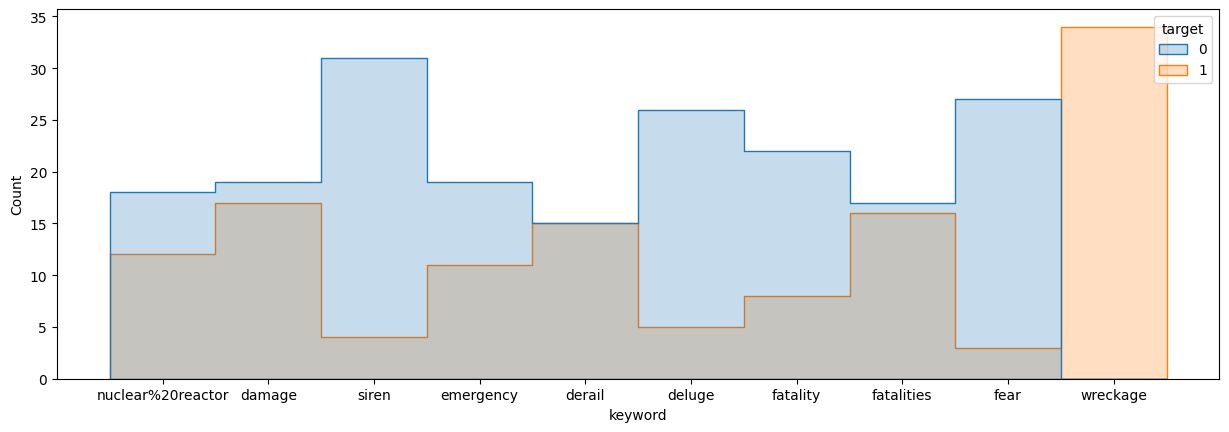

In [ ]:
fig, ax = plt.subplots()
fig.set_figwidth(15)
ax = sns.histplot(df, x='keyword', hue='target', element='step')
plt.show()

**Выводы**: Объем нулевого класса в общем случае больше, чем еденичного (в общем распределении классов примерно на 30%), но есть некоторые записи, которые полностью относятся к "1", "0" или распределены примерно (или точно) 50/50 (их меньшинство)


## Задание 3 (0.5 балла) 

В этом задании предлагается объединить все три текстовых столбца в один (просто сконкатенировать cтроки) и убрать столбец с индексом.

In [8]:
train.loc[[6590, 7122, 2769]]

,id,keyword,location,text,target
6590,9436,survivors,"Marietta, GA",Stemming from my #Cubs talk- the team rosters ...,1
7122,10203,violent%20storm,,If you were the NWS wth a rotating storm w/ a ...,1
2769,3980,devastation,Atlanta g.a.,http://t.co/Gxgm1T3W0J From Devastation to Ela...,0


In [9]:
train_new = train
train_new['text1'] = train_new['keyword'] + ' ' + train_new['location'] + ' ' + train_new['text']
train_new = train_new.drop(['id', 'keyword', 'location', 'text'], axis=1)
train_new = train_new.rename({'text1': 'text'}, axis=1)
train_new = train_new[['text', 'target']]

train = train.drop('text1', axis=1)


In [10]:
train_new.loc[[6590, 7122, 2769]]

,text,target
6590,"survivors Marietta, GA Stemming from my #Cubs ...",1
7122,violent%20storm If you were the NWS wth a rot...,1
2769,devastation Atlanta g.a. http://t.co/Gxgm1T3W0...,0


## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


**#train часть - это train_new или старый train??**

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

# -- YOUR CODE HERE --
cnt_vec = CountVectorizer()
X = cnt_vec.fit_transform(train_new['text'])
X.toarray()
pd.DataFrame(X.toarray(), columns=cnt_vec.get_feature_names_out())

,00,000,0000,00cy9vxeff,00end,00pm,01,011072,014213,02,...,ûïthe,ûïwe,ûïwhen,ûïyou,ûò,ûò800000,ûó,ûóher,ûókody,ûótech
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5325,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5326,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5327,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**2. Размер матрицы: (5329, 18455)**

## Задание 5 (1 балл)

В предыдущем пункте у вас должна была получиться достаточно большая матрица.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов, ссылок и прочего мусора.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле vocabulary_ инстанса этого класса. Давайте напишем функцию, которая печает ответы на следующие вопросы:

1. Найдите в этом словаре все слова, которые содержат цифры. Сколько таких слов нашлось?

2. Найдите все слова, которые содержат символы пунктуации. Сколько таких слов нашлось? 

3. Сколько хэштегов (токен начинается на #) и упоминаний (токен начинается на @) осталось в словаре?

In [12]:
import string

In [13]:

def contains_digit(s: str) -> bool:
    # Проверка, содержит ли слово цифры
    return any(char.isdigit() for char in s)

def contains_punctuation(s: str) -> bool:
    # Проверка, содержит ли слово пунктуацию
    return any(x in string.punctuation for x in s)

def is_hashtag(s: str) -> bool:
    # Проверка, является ли слово хэштегом
    return s[0] == '#'

def is_mention(s: str) -> bool:
    # Проверка, является ли слово упоминанием
    return s[0] == '@'

def investigate_vocabulary(vocabulary):
    d = [[contains_digit(d), contains_punctuation(d), is_hashtag(d), is_mention(d)] for d in vocabulary.keys()]
    d = np.sum(d, axis=0)
    print('With digit:      ', d[0]
          )
    print('With punctuation:', d[1]
          )
    print('Hashtags:        ', d[2]
          )
    print('Mentions:        ', d[3]
          )




In [14]:
dummy_vocab = {'th1nk' : 0,
               'think333' : 1,
               'think.' : 2,
               'th!nk' : 3,
               'th...nk' : 4,
               '#think' : 5,
               '@think' : 6,
               '@thinking':7,
               '@nothink' : 8,
               'think' : 9}
investigate_vocabulary(dummy_vocab)

With digit:       2
With punctuation: 7
Hashtags:         1
Mentions:         3


In [15]:
investigate_vocabulary(cnt_vec.vocabulary_)

With digit:       3812
With punctuation: 315
Hashtags:         0
Mentions:         0


## Задание 6 (0.5 балла)

Вспомним, что на семинаре по текстам мы узнали, что в nltk есть специальный токенизатор для текстов - TweetTokenizer. Попробуем применить CountVectorizer с этим токенизатором. Ответьте на все вопросы из предыдущего пункта для TweetTokenizer и сравните результаты.

In [16]:
from nltk.tokenize import TweetTokenizer
# Чтобы узнать, какие параметры есть у этого токенайзера - используйте help(TweetTokenizer)
# Для того, чтобы передать токенайзер в CountVectorizer используйте параметр tokenizer

In [ ]:
vect = CountVectorizer(tokenizer=TweetTokenizer().tokenize)
vect.fit_transform(train_new['text'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


<5329x19670 sparse matrix of type '<class 'numpy.int64'>'
	with 94563 stored elements in Compressed Sparse Row format>

In [ ]:
investigate_vocabulary(vect.vocabulary_)

With digit:       3939
With punctuation: 7338
Hashtags:         1470
Mentions:         1679


**Сравнение:** Результаты стали намного интереснее. В целом стало намного больше отдельных токенок и отобразились те, в которых присутствуют хештеги и упоминания (это плюс, так как мы исследуем твиты)

## Задание 7 (2 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью TweetTokenizer из пакета nltk
2. Удалит все токены содержащие не латинские буквы, кроме смайликов (будем считать ими токены содержащие только пунктуацию и, как минимум, одну скобочку) и хэштегов, которые после начальной # содержат только латинские буквы.
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords.words('english')
4. Проведет стемминг с помощью SnowballStemmer



In [17]:
import re
import nltk
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [73]:
def contains_only_latin_letters(s: str) -> bool:
    # Проверка, содержит ли слово только латинские буквы
    return True if re.match(r'^[a-z]+$', s) else False

def is_emoji(s: str) -> bool:
    # Проверка, является ли слово смайликом
    return all(x in punctuation for x in s) and any(x in ['(', ')'] for x in s)

def is_hashtag(s: str) -> bool:
    # Проверка, является ли слово хэштегом
    return s[0] == '#' and contains_only_latin_letters(s[1:])

def custom_tokenizer(s: str) -> List[str]:    
    # Кастомный токенайзер
    s = s.lower()
    tk = TweetTokenizer()
    tokens = np.array(tk.tokenize(s))
    tokens = tokens[
         np.array(list(map(contains_only_latin_letters, tokens))) ^ np.array(list(map(is_emoji, tokens))) ^
         np.array(list(map(is_hashtag, tokens)))]
    tokens = tokens[~np.isin(tokens, nltk.corpus.stopwords.words('english'))]
    stemmer = SnowballStemmer("english")
    tokens_stemmed = [stemmer.stem(w) for w in tokens]
    return tokens_stemmed 
  

In [74]:
custom_tokenizer('She LOVES painting :-) #art')

['love', 'paint', ':-)', '#art']

Продемонстрируйте работу вашей функции на первых десяти текстах в обучающей выборке.

In [58]:
train_test = np.array(train_new[:10].text)
train_test = np.array(list(map(custom_tokenizer, train_test)))
print(train_test)

[list(['bridg', 'ash', 'australia', 'collaps', 'trent', 'bridg', 'among', 'worst', 'histori', 'england', 'bundl', 'australia'])
 list(['hail', 'carol', 'stream', 'illinoi', 'great', 'michigan', 'techniqu', 'camp', 'thank', '#goblu', '#wrestleon'])
 list(['polic', 'houston', 'cnn', 'tennesse', 'movi', 'theater', 'shoot', 'suspect', 'kill', 'polic'])
 list(['riot', 'still', 'riot', 'coupl', 'hour', 'left', 'class'])
 list(['wound', 'lake', 'highland', 'crack', 'path', 'wipe', 'morn', 'beach', 'run', 'surfac', 'wound', 'left', 'elbow', 'right', 'knee'])
 list(['airplan', 'somewher', 'expert', 'franc', 'begin', 'examin', 'airplan', 'debri', 'found', 'reunion', 'island', 'french', 'air', 'accid', 'expert', '#mlb'])
 list(['bloodi', 'isol', 'citi', 'world', 'perth', 'came', 'kill', 'indian', 'fun', 'video', 'smirk', 'remorseless', 'pakistani', 'killer', 'show', 'boast'])
 list(['burn', 'except', 'idk', 'realli', 'burn'])
 list(['destroy', '(', 'ask', ')', 'destroy', 'hous'])
 list(['wound', 

<ipython-input-58-129ed924ef51>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_test = np.array(list(map(custom_tokenizer, train_test)))


## Задание 8 (1 балл)

1. Примените CountVectorizer с реализованным выше токенизатором к обучающим и тестовым выборкам.


**#Переделаем test в test_new**

In [50]:
test_new = test
test_new['text1'] = test_new['keyword'] + ' ' + test_new['location'] + ' ' + test_new['text']
test_new = test_new.drop(['id', 'keyword', 'location', 'text'], axis=1)
test_new = test_new.rename({'text1': 'text'}, axis=1)
test_new = test_new[['text', 'target']]

test = test.drop('text1', axis=1)


In [59]:
custom_vect = CountVectorizer(tokenizer=custom_tokenizer)
X = custom_vect.fit_transform(train_new['text'])
X_test = custom_vect.transform(test_new['text'])


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


2. Обучите LogisticRegression на полученных признаках.


In [60]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X, train_new['target'])

3. Посчитайте метрику f1-score на тестовых данных.

In [62]:
from sklearn.metrics import f1_score

pred = clf.predict(X_test)
print('F1 score:', f1_score(test_new['target'], pred))

F1 score: 0.754433100483611


## Задание 9 (1 балл)

1. Повторите 8 задание, но с tf-idf векторизатором. Как изменилось качество?


In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer)
tf_X = vectorizer.fit_transform(train_new['text'])
tf_X_test = vectorizer.transform(test_new['text'])

tf_clf = LogisticRegression().fit(tf_X, train_new['target'])

tf_pred = tf_clf.predict(tf_X_test)
print('F1 score:', f1_score(test_new['target'], tf_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


F1 score: 0.7422222222222221


In [67]:
print(tf_X.shape)

(5329, 10607)


1. **Ответ:** Качество изменилось не критично, практически у тех же значений, что и было.

2. Мы можем еще сильнее уменьшить размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?


In [66]:
# 2
vectorizer2 = TfidfVectorizer(tokenizer=custom_tokenizer, max_df=0.9)
tf2_X = vectorizer2.fit_transform(train_new['text'])
tf2_X_test = vectorizer2.transform(test_new['text'])

tf2_clf = LogisticRegression().fit(tf2_X, train_new['target'])

tf2_pred = tf2_clf.predict(tf2_X_test)
print('F1 score:', f1_score(test_new['target'], tf2_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


F1 score: 0.7422222222222221


In [68]:
print(tf2_X.shape)

(5329, 10607)



2. **Ответ:** Размер матрицы никак не изменился, значит слов, которые встречаются в >90% случаев нет. Как следствие, качество не изменилось.

3. Также мы можем уменьшить размер матрицы, удаляя слова со слишком маленьким df. Удалось ли добиться улучшения качества? 

In [81]:
# 3
vectorizer3 = TfidfVectorizer(tokenizer=custom_tokenizer, min_df = 0.001, max_df=0.9)
tf3_X = vectorizer3.fit_transform(train_new['text'])
tf3_X_test = vectorizer3.transform(test_new['text'])

tf3_clf = LogisticRegression().fit(tf3_X, train_new['target'])

tf3_pred = tf3_clf.predict(tf3_X_test)
print('F1 score:', f1_score(test_new['target'], tf3_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


F1 score: 0.7445175438596492


In [82]:
print(tf3_X.shape)

(5329, 1740)


3. **Ответ:** Проигнорировал некоторые очень редкие слова, мы уменьшили размер матрицы и получили прирост качества, но очень незначительный

## Задание 10 (1 балл)

Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 8 с HashingVectorizer, укажите количество фичей равное 5000.


In [72]:
from sklearn.feature_extraction.text import HashingVectorizer

vectorizer4 = HashingVectorizer(tokenizer=custom_tokenizer, n_features=5000)
X4 = vectorizer4.fit_transform(train_new['text'])
X4_test = vectorizer4.transform(test_new['text'])

clf4 = LogisticRegression().fit(X4, train_new['target'])

pred4 = clf4.predict(X4_test)
print('F1 score:', f1_score(test_new['target'], pred4))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


F1 score: 0.7191513121161363


2. Какой из подходов показал самый высокий результат?

2. **Ответ:** Самый высокий результат показал подход с использованием стандартного CountVectorize, при этом результаты в других случая не сильно отличались.

## Задание 11 (1 балл)

В этом задании нужно добиться f1 меры хотя в 0.75 на тестовых данных.

In [83]:
# Используем результаты из 8 задачи

print('F1 score:', f1_score(test_new['target'], pred)) 

F1 score: 0.754433100483611
